# Método de Newton

O **método de Newton** pode ser usado para minimizar funções estritamente convexas, ou para maximizar funções estritamente côncavas.. Ele usa a expansão de Taylor de segunda ordem para atualizar a solução iterativamente:

$$
x_{k+1} = x_k - H_f(x_k)^{-1} \nabla f(x_k)
$$

### Passos do Algoritmo:
1. Calcular o gradiente $ \nabla f(x) $ e a Hessiana $ H_f(x) $.
2. Resolver o sistema linear $ H_f(x) d = -\nabla f(x) $ para encontrar a direção $ d $.
3. Atualizar $ x $ com $ x \leftarrow x + d $ até a convergência.

### Interpretação Geométrica

O **método de Newton** para otimização multivariável utiliza tanto o **gradiente** (direção de maior variação da função) quanto a **curvatura** da função (representada pela matriz Hessiana) para ajustar a trajetória de descida. Geometricamente:

1. **Gradiente**: Aponta a direção de maior declive da função.
2. **Curvatura**: A matriz Hessiana ajusta essa direção, levando em conta a curvatura local da função, permitindo uma descida mais eficiente.
3. O método de Newton usa a direção corrigida com base na curvatura, o que acelera a convergência para o mínimo.

###Implementação

In [ ]:
import autograd.numpy as np
from autograd import grad, hessian

def newton_method(f, x0):
    tolerance = 1e-6
    max_iterations = 100
    gradient_of_f = grad(f)
    hessian_of_f = hessian(f)
    x = np.array(x0, dtype=float)

    for _ in range(max_iterations):
        gradient_value = gradient_of_f(x)

        if np.linalg.norm(gradient_value) < tolerance:
            break

        hessian_value = hessian_of_f(x)

        try:
            d = np.linalg.solve(hessian_value, -gradient_value)
        except np.linalg.LinAlgError:
            print("Método falhou devido a Hessiana indefinida ou singular.")
            return x

        x = x + d

    return f(x), x

###Resultados

In [ ]:
def print_result_newton(function_name, function, initial_point):
    min_value, min_point = newton_method(function, initial_point)
    print(f'\n### Resultado para {function_name} ###')
    print(f'Ponto inicial: {initial_point}')
    print(f'Ponto ótimo: {min_point.tolist()}')
    print(f'Valor ótimo: {min_value}\n')

def f1(x):
    return (x[0] - 2)**4 + (x[0] - 2*x[1])**2

def f2(x):
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

def f3(x):
    return 0.1 * (12 + x[0]**2 + (1 + x[1]**2) / x[0]**2 + (x[0]**2 * x[1]**2 + 100) / (x[0]**4 * x[1]**4))

def f4(x):
    return (x[0]**2 + x[1]**2 + x[0] * x[1])**2 + np.sin(x[0])**2 + np.cos(x[1])**2

print_result_newton('f1', f1, [0, 3])
print_result_newton('f1', f1, [-1, -1])

print_result_newton('f2', f2, [-5, 5])
print_result_newton('f2', f2, [100, 1])

print_result_newton('f3', f3, [0.5, 0.5])
print_result_newton('f3', f3, [3, -3])

print_result_newton('f4', f4, [3, 1])
print_result_newton('f4', f4, [2, -2])


### Resultado para f1 ###
Ponto inicial: [0, 3]
Ponto ótimo: [1.9954326834789569, 0.9977163417394784]
Valor ótimo: 4.351554622301365e-10


### Resultado para f1 ###
Ponto inicial: [-1, -1]
Ponto ótimo: [1.9954326834789569, 0.9977163417394784]
Valor ótimo: 4.351554622301365e-10


### Resultado para f2 ###
Ponto inicial: [-5, 5]
Ponto ótimo: [0.9999999999999999, 0.9999999999999998]
Valor ótimo: 1.232595164407831e-32


### Resultado para f2 ###
Ponto inicial: [100, 1]
Ponto ótimo: [1.0, 1.0]
Valor ótimo: 0.0


### Resultado para f3 ###
Ponto inicial: [0.5, 0.5]
Ponto ótimo: [1.743452042863633, 2.0296945240861337]
Valor ótimo: 1.7441520055877473


### Resultado para f3 ###
Ponto inicial: [3, -3]
Ponto ótimo: [1.7434520869398245, 2.0296947099975435]
Valor ótimo: 1.7441520055877389


### Resultado para f4 ###
Ponto inicial: [3, 1]
Ponto ótimo: [-0.15543723532377063, 0.6945637885968744]
Valor ótimo: 0.7731990564929242


### Resultado para f4 ###
Ponto inicial: [2, -2]
Ponto ótimo: [0.1554372

#Método do Gradiente

# Princípio Básico
O método de gradiente é baseado na ideia de que a direção de maior diminuição da função em um ponto $x_{k}$
é dada pelo negativo do gradiente da função nesse ponto. Matematicamente, a atualização da solução é dada por:
$$
x_{k+1} = x_k - \alpha \nabla f(x_k)
$$
onde:

*  $x_{k}$ é o ponto atual,
*  $\alpha$ é o tamanho do passo (ou taxa de aprendizagem),
*  $\nabla f(x_k)$ é o vetor gradiente da função f em $x_{k}$ que indica a direção de maior variação de f.

# Gradiente
O gradiente $∇f(x)$ de uma função f(x) é um vetor composto pelas derivadas parciais de f em relação a cada uma das variáveis de entrada. Ele aponta na direção de maior aumento da função, e o método de gradiente usa a direção oposta (direção de descida).

# Critérios de Parada

O método de gradiente pode ser interrompido quando:

*   O gradiente da função em $x_{k}$ é suficientemente pequeno (ou seja,
∥$\nabla f(x_k)$∥ é pequeno o suficiente).
*   A função atinge um valor de $f(x_k)$ dentro de uma tolerância pré-estabelecida.
*   O número máximo de iterações é alcançado.

# Tamanho de Passo($\alpha_{k}$)
O parâmetro $\alpha_{k}$ determina o quanto devemos mover em cada iteração. Ele pode ser fixo ou adaptativo (alterando-se ao longo das iterações). Existem várias formas de escolher $\alpha_{k}$, sendo as mais comuns:


*   **Escolha fixa**: Um valor constante para o passo em todas as iterações.
*   Busca de linha: Um método que ajusta $\alpha_{k}$ em cada iteração, procurando um valor que minimiza $f(x_k - \alpha \nabla f(x_k))$

# Convergência
A convergência do método de gradiente depende de vários fatores, como o comportamento da função (por exemplo, se é convexa ou não) e a escolha do tamanho de passo $\alpha_{k}$. Em geral:


*   Para funções convexas e $\alpha_{k}$ apropriado, o método converge para o ponto de mínimo global.
*   Para funções não convexas, o método pode convergir para um mínimo local ou estagnar em regiões planas.

###Implementação e Resultados

In [ ]:
import numpy as np

# Função objetivo fornecida
def funcao_1(x):
    return (x[0] - 2)**4 + (x[0] - 2*x[1])**2

# Gradiente da função objetivo (derivadas parciais)
def gradiente_1(x):
    df_dx0 = 4 * (x[0] - 2)**3 + 2 * (x[0] - 2*x[1])
    df_dx1 = -4 * (x[0] - 2*x[1])
    return np.array([df_dx0, df_dx1])

# Função 2: Rosenbrock
def funcao_2(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

# Gradiente da função 2
def gradiente_2(x):
    df_dx0 = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    df_dx1 = 200 * (x[1] - x[0]**2)
    return np.array([df_dx0, df_dx1])

# Função 3
def funcao_3(x):
    return 0.1 * (12 + x[0]**2 + (1 + x[1]**2) / x[0]**2 + (x[0]**2 * x[1]**2 + 100) / (x[0]**4 * x[1]**4))

# Gradiente da função 3
def gradiente_3(x):
    df_dx0 = (2 * x[0] + 2 * x[0] * (1 + x[1]**2) / x[0]**3 - 4 * x[0] * x[1]**2 / x[0]**5 - 400 * x[1]**2 * x[0]**2 / x[0]**8) * 0.1
    df_dx1 = (2 * x[1] / x[0]**2 + 400 * x[0]**2 * x[1] / x[0]**8) * 0.1
    return np.array([df_dx0, df_dx1])

# Função 4
def funcao_4(x):
    return (x[0]**2 + x[1]**2 + x[0] * x[1])**2 + np.sin(x[0])**2 + np.cos(x[1])**2

# Gradiente da função 4
def gradiente_4(x):
    df_dx0 = 2 * (x[0]**2 + x[1]**2 + x[0] * x[1]) * (2 * x[0] + x[1]) + 2 * np.sin(x[0]) * np.cos(x[0])
    df_dx1 = 2 * (x[0]**2 + x[1]**2 + x[0] * x[1]) * (2 * x[1] + x[0]) - 2 * np.sin(x[1]) * np.cos(x[1])
    return np.array([df_dx0, df_dx1])

# Método de Busca Linear - Seção Áurea
def secao_aurea(funcao, gradiente, x, d, tol=1e-5, max_iter=100):
    def f_t(t):
        return funcao(x + t * d)

    a = 0
    b = 1
    gr = (1 + np.sqrt(5)) / 2  # Razão áurea
    res = tol * (b - a)

    while b - a > res:
        t1 = b - (b - a) / gr
        t2 = a + (b - a) / gr
        if f_t(t1) < f_t(t2):
            b = t2
        else:
            a = t1

    t_otimo = (a + b) / 2
    return t_otimo

# Método de Busca Linear - Regra de Armijo
def armijo(funcao, gradiente, x, d, alpha=1, beta=0.5, sigma=1e-4):
    t = alpha
    while funcao(x + t * d) > funcao(x) + sigma * t * np.dot(gradiente(x), d):
        t *= beta
    return t

# Método de Busca Linear - Passo Fixo
def passo_fixo(funcao, gradiente, x, d, passo=0.01):
    return passo

# Método de Busca Linear - Busca de Linha
def busca_de_linha(funcao, gradiente, x, d, alpha=0.1, beta=0.7, max_iter=100):
    t = 1  # Começamos com um passo de tamanho 1
    for _ in range(max_iter):
        if funcao(x + t * d) < funcao(x) + alpha * t * np.dot(gradiente(x), d):
            return t  # Se a condição for atendida, retornamos o valor de t
        t *= beta  # Se não, diminuímos t
    return t

# Método de otimização irrestrita gradiente
def GRADIANDO(funcao, gradiente_func, ponto_inicial, alpha=0.01, tol=1e-6, max_iter=1000, busca_linear='seção'):
    x = np.array(ponto_inicial)  # Ponto inicial
    iter_count = 0

    while iter_count < max_iter:
        grad = gradiente_func(x)  # Calcula o gradiente no ponto atual
        grad_norm = np.linalg.norm(grad)  # Norma do gradiente

        # Verifica se o gradiente é pequeno o suficiente para convergir
        if grad_norm < tol:
            break

        d = -grad  # Direção de descida

        # Escolher o método de busca linear
        if busca_linear == 'seção':
            t = secao_aurea(funcao, gradiente_func, x, d)
        elif busca_linear == 'armijo':
            t = armijo(funcao, gradiente_func, x, d, alpha=alpha)
        elif busca_linear == 'passo_fixo':
            t = passo_fixo(funcao, gradiente_func, x, d)
        elif busca_linear == 'linha':
            t = busca_de_linha(funcao, gradiente_func, x, d, alpha=alpha)

        # Atualiza a posição
        x = x + t * d

        iter_count += 1

    # Retorna o valor da função objetivo no ponto ótimo e o ponto ótimo
    return funcao(x), x

# Função para selecionar a função objetivo, o método de busca e os pontos iniciais
def escolher_opcoes():
    print("Escolha a função objetivo:")
    print("1: Função 1")
    print("2: Função 2")
    print("3: Função 3")
    print("4: Função 4")
    escolha_funcao = int(input("Digite o número da função desejada: "))

    if escolha_funcao == 1:
        funcao = funcao_1
        gradiente = gradiente_1
    elif escolha_funcao == 2:
        funcao = funcao_2
        gradiente = gradiente_2
    elif escolha_funcao == 3:
        funcao = funcao_3
        gradiente = gradiente_3
    elif escolha_funcao == 4:
        funcao = funcao_4
        gradiente = gradiente_4
    else:
        print("Opção inválida!")
        return

    print("Escolha o método de busca linear:")
    print("1: Seção Áurea")
    print("2: Regra de Armijo")
    print("3: Passo Fixo")
    print("4: Busca de Linha")
    escolha_busca = int(input("Digite o número do método desejado: "))

    if escolha_busca == 1:
        busca_linear = 'seção'
    elif escolha_busca == 2:
        busca_linear = 'armijo'
    elif escolha_busca == 3:
        busca_linear = 'passo_fixo'
    elif escolha_busca == 4:
        busca_linear = 'linha'
    else:
        print("Opção inválida!")
        return

    print("Escolha os pontos iniciais (exemplo: [1, 1]):")
    ponto_inicial = input("Digite os pontos iniciais (como uma lista [x, y]): ")
    ponto_inicial = eval(ponto_inicial)  # Converte a entrada do usuário em uma lista de números

    return funcao, gradiente, ponto_inicial, busca_linear

# Main: executa o código com as escolhas do usuário
def main():
    funcao, gradiente_func, ponto_inicial, busca_linear = escolher_opcoes()

    if funcao is not None:
        FunOpt, PointOpt = GRADIANDO(funcao, gradiente_func, ponto_inicial, busca_linear=busca_linear)
        print(f"Valor da função objetivo no ponto ótimo: {FunOpt}")
        print(f"Ponto ótimo: {PointOpt}")

# Executar o programa
main()

Escolha a função objetivo:
1: Função 1
2: Função 2
3: Função 3
4: Função 4
Digite o número da função desejada: 1
Escolha o método de busca linear:
1: Seção Áurea
2: Regra de Armijo
3: Passo Fixo
4: Busca de Linha
Digite o número do método desejado: 1
Escolha os pontos iniciais (exemplo: [1, 1]):
Digite os pontos iniciais (como uma lista [x, y]): 0,3
Valor da função objetivo no ponto ótimo: 4.720885875757211e-07
Ponto ótimo: [2.02620981 1.01309815]


#Método BFGS

## Algoritmo BFGS

O **BFGS (Broyden–Fletcher–Goldfarb–Shanno)** é um método iterativo para otimização não linear que aproxima a Hessiana da função objetivo para encontrar a direção de busca. Ele é uma alternativa ao método de Newton que não requer o cálculo da Hessiana a cada iteração, tornando-o mais eficiente em problemas de grande escala.

### Passos do Algoritmo:

1. **Inicialização:**
   *   Escolha um ponto inicial $x_0$.
   *   Aproxime a inversa da Hessiana inicial $H_0$ (geralmente a matriz identidade).
   *   Defina uma tolerância $\epsilon$ > 0 e um número máximo de iterações.
   *   $k = 0$

2.  **Critério de Parada:**
    *   Se $||∇f(x_k)||$ < $\epsilon$ ou $k > limite $, pare. $xk$ é a solução aproximada.

3. **Direção de Busca:**
   *   Calcule a direção de busca: $pk = -Hk*∇f(x_k)$
      *   $∇f(x_k)$ é o gradiente da função objetivo $f$ avaliado em $xk$.

4. **Busca Linear:**
   *   Encontre um tamanho de passo $alpha_k$ ao longo da direção $pk$ usando uma busca linear (e.g., condições de Wolfe, bisseção, seção áurea).
   *   Atualize o ponto: $x_{k+1} = x_k + \alpha * pk$

5. **Atualização da Aproximação da Hessiana Inversa:**
   *   Calcule:
        * $s_k = x_{k+1} - x_k$ (A mudança no ponto)
        * $y_k = ∇f(x_{k+1}) - ∇f(x_k)$ (A mudança no gradiente)

    * Calcule a atualização da Hessiana Inversa usando a fórmula BFGS
     
       $$H_{k+1} = (I - ρ_k * s_k * y_k^T)* H_k*(I - ρ_k * y_k *sk^T) + ρ_k * s_k *s_k^T$$

       *  Onde:
           *   $ρ_k = 1 / (y_k^T * s_k)$(Garante que a atualização seja bem definida)
           *   $I$ é a matriz identidade.
           * $yk^T$ denota a transposta do vetor $y_k$.
   *

6. **Incremento:**
   *   $k = k + 1$
   *   Retorne ao Passo 2

### Interpretação Geométrica

O **algoritmo BFGS** combina informações do **gradiente** da função objetivo com uma aproximação da sua **curvatura** (representada pela Hessiana) para direcionar a busca pelo mínimo.

1.  **Gradiente:**
2.  **Aproximação da Hessiana**
3.  **Direção de Busca**
4. **Busca Linear**

## Implementação

In [ ]:
!pip install numdifftools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 4.2 MB/s eta 0:00:00


In [ ]:
import numdifftools as nd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Condição de descréscimo suficiente (ou condiçõa de Armijo)

def wolfe_conditions(xk, pk, ak, f, c1=10**(-4), c2 =0.9):
    # verificar se f(xk + αk pk) ≤ f(xk) + c1 αk pkT ∇f(xk)
    condicao_1 = f(xk + ak*pk) <= f(xk) +  c1*ak*np.transpose(nd.Gradient(f)(xk))@pk
    # -pkT*∇f(xk + αk*pk) <= - c2*pkT*∇f(xk) (onde 0<c1<c2<1)
    condicao_2 = - np.transpose(pk)@nd.Gradient(f)(xk + ak*pk)<= -c2*np.transpose(nd.Gradient(f)(xk))@pk
    if condicao_1 and condicao_2:
        return True
    return False

def line_search(f, xk, pk):
    alpha = 1.0
    while not wolfe_conditions(xk, pk, alpha, f,):
        alpha *= 0.5
    return alpha

def teste_line_search_wolfe(f, x, pk):
    alpha = line_search(f, x, pk)
    x_novo = x + alpha * pk
    return x_novo, alpha

def gc_search(f, xk, pk, a=0.0, b=1.0, tol=1e-5, max_iter=100):

    phi = (np.sqrt(5) - 1) / 2  # Razão áurea

    for _ in range(max_iter):
        x1 = a + (1 - phi) * (b - a)
        x2 = a + phi * (b - a)

        f1 = f(xk + x1 * pk)
        f2 = f(xk + x2 * pk)

        if f1 < f2:
            b = x2
        else:
            a = x1

        if b - a < tol:
            break

    return (a + b) / 2  # Retorna o ponto médio do intervalo final

In [ ]:
# Dado um ponto inicial x_0 uma aproximação das inversa da hessiana Ho e um escalar e > 0
def bfgs(f,ponto_inicial, e = 10**-6, busca = None):
    # Passo1 : inicialização do algortimo
    k = 0
    xk = ponto_inicial
    Hk = np.eye(len(xk))
    grad = nd.Gradient(f)(xk)
    # Passo 2: Se || grad(f(x_k)) || <= e, pare com x_k como solução

    while np.linalg.norm(grad) > e and k <= 500:

        grad = nd.Gradient(f)(xk)

        # Passo 3: Calcule uma direção de busca p_k = - H_k @ grad
        pk = - Hk@ grad

        # Passo 4: x_k+1 <- x_k + alpha * pk
        # Computa condições de Wolfe
        if busca ==None:
            xk_prox, alpha = teste_line_search_wolfe(f, xk, pk)
        elif busca == 'aurea':
             alpha = gc_search(f, xk, pk)
             xk_prox = xk + alpha*pk

        # Passo 5: Definição de s_k e y_k

        sk = alpha *pk
        yk = nd.Gradient(f)(xk_prox) - grad

        denom = np.transpose(yk) @ sk
        if abs(denom) < 1e-10:
            print("Divisão por zero evitada na atualização de Hk")
            return f(xk),xk

        # Passo 6: Atualização de H_k usando a fórmula BFGS
        rho_k = 1.0 / (np.transpose(yk) @ sk)  # Produto interno (escalar)
        I = np.eye(len(xk))  # Matriz identidade
        lambda_reg = 1e-6  # Valor da regularização
        Hk_prox = (I - rho_k * sk @ np.transpose(yk)) @ Hk @ (I - rho_k * yk @ np.transpose(sk)) + rho_k * sk @ np.transpose(sk)
        Hk = Hk_prox + lambda_reg * np.eye(len(xk))  # Adiciona regularização

        Hk = Hk_prox  # Atualiza H_k
        xk = xk_prox # Atualiza x_k
        k+=1 # incrementa k"

    Functopt = f(xk)
    PontoOpt = xk
    return Functopt,PontoOpt

## Resultados

In [ ]:
# Busca por Armijo
def f1(x):
    return (x[0] - 2)**4 + (x[0] - 2*x[1])**2
def f2(x):
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2
def f3(x):
    return 0.1*(12 + x[0]**2 + (1+x[1]**2)/(x[0]**2) + (x[0]**2*x[1]**2 + 100)/(x[0]**4)*(x[1]**4))
def f4(x):
    return (x[0]**2 + x[1]**2 + x[0]*x[1])**2 + np.sin(x[0])**2 + np.cos(x[1])**2
print("Teste 1")

teste11 = bfgs(f1,[0,3])
teste12 = bfgs(f1,[-1,-1])

print(f"Função f1:")
print(f"Ponto inicial: [0,3] > ponto_opt: {teste11[1]} | valor da função: {teste11[0]}")
print(f"Ponto inicial: [1,2] > ponto_opt: {teste12[1]} | valor da função: {teste12[0]}\n")

print("Teste 2")
teste21 = bfgs(f2,[-5,5])
teste22 =bfgs(f2,[100,-1])
print(f"Função f2:")
print(f"Ponto inicial: [-5,5] > ponto_opt: {teste21[1]} | valor da função: {teste21[0]}")
print(f"Ponto inicial: [100,-1] > ponto_opt: {teste22[1]} | valor da função: {teste22[0]}\n")

print("Teste 3")
teste31 =bfgs(f3,[0.5,0.5])
teste32= bfgs(f3,[3, -3])
print(f"Função f3:")
print(f"Ponto inicial: [0.5,0.5] > ponto_opt: {teste31[1]} | valor da função: {teste31[0]}")
print(f"Ponto inicial: [3, -3] > ponto_opt: {teste32[1]} | valor da função: {teste32[0]}\n")


print("Teste 4")
teste41 =bfgs(f4,[3,1])
teste42 =bfgs(f1,[2,-2])
print(f"Função f4:")
print(f"Ponto inicial: [3,1] > ponto_opt: {teste41[1]} | valor da função: {teste41[0]}")
print(f"Ponto inicial: [2,-2] > ponto_opt: {teste41[1]} | valor da função: {teste41[0]}")


Teste 1
Função f1:
Ponto inicial: [0,3] > ponto_opt: [2.04106548 1.02048537] | valor da função: 2.8528328668538097e-06
Ponto inicial: [1,2] > ponto_opt: [1.94982035 0.97501005] | valor da função: 6.380206590191518e-06

Teste 2
Função f2:
Ponto inicial: [-5,5] > ponto_opt: [2.76419485 7.64343083] | valor da função: 3.1130897880440513
Ponto inicial: [100,-1] > ponto_opt: [1.10428649 1.22009419] | valor da função: 0.01091734307644012

Teste 3
Função f3:
Ponto inicial: [0.5,0.5] > ponto_opt: [ 1.02899343 -0.05780879] | valor da função: 1.4007420773639998
Ponto inicial: [3, -3] > ponto_opt: [ 1.04871973 -0.08899013] | valor da função: 1.402144425243888

Teste 4
Divisão por zero evitada na atualização de Hk
Função f4:
Ponto inicial: [3,1] > ponto_opt: [ 0.15542763 -0.69455193] | valor da função: 0.773199056769762
Ponto inicial: [2,-2] > ponto_opt: [ 0.15542763 -0.69455193] | valor da função: 0.773199056769762


In [ ]:
# Busca por seção aurea
def f1(x):
    return (x[0] - 2)**4 + (x[0] - 2*x[1])**2
def f2(x):
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2
def f3(x):
    return 0.1*(12 + x[0]**2 + (1+x[1]**2)/(x[0]**2) + (x[0]**2*x[1]**2 + 100)/(x[0]**4)*(x[1]**4))
def f4(x):
    return (x[0]**2 + x[1]**2 + x[0]*x[1])**2 + np.sin(x[0])**2 + np.cos(x[1])**2
print("Teste 1")

teste11 = bfgs(f1,[0,3], busca = 'aurea')
teste12 = bfgs(f1,[-1,-1], busca = 'aurea')

print(f"Função f1:")
print(f"Ponto inicial: [0,3] > ponto_opt: {teste11[1]} | valor da função: {teste11[0]}")
print(f"Ponto inicial: [1,2] > ponto_opt: {teste12[1]} | valor da função: {teste12[0]}\n")

print("Teste 2")
teste21 = bfgs(f2,[-5,5], busca = 'aurea')
teste22 =bfgs(f2,[100,-1], busca = 'aurea')
print(f"Função f2:")
print(f"Ponto inicial: [-5,5] > ponto_opt: {teste21[1]} | valor da função: {teste21[0]}")
print(f"Ponto inicial: [100,-1] > ponto_opt: {teste22[1]} | valor da função: {teste22[0]}\n")

print("Teste 3")
teste31 =bfgs(f3,[0.5,0.5], busca = 'aurea')
teste32= bfgs(f3,[3, -3], busca = 'aurea')
print(f"Função f3:")
print(f"Ponto inicial: [0.5,0.5] > ponto_opt: {teste31[1]} | valor da função: {teste31[0]}")
print(f"Ponto inicial: [3, -3] > ponto_opt: {teste32[1]} | valor da função: {teste32[0]}\n")


print("Teste 4")
teste41 =bfgs(f4,[3,1], busca = 'aurea')
teste42 =bfgs(f1,[2,-2], busca = 'aurea')
print(f"Função f4:")
print(f"Ponto inicial: [3,1] > ponto_opt: {teste41[1]} | valor da função: {teste41[0]}")
print(f"Ponto inicial: [2,-2] > ponto_opt: {teste41[1]} | valor da função: {teste41[0]}")

Teste 1
Função f1:
Ponto inicial: [0,3] > ponto_opt: [2.02244329 1.01124938] | valor da função: 2.5679181341166137e-07
Ponto inicial: [1,2] > ponto_opt: [1.97788818 0.98893767] | valor da função: 2.392200184937011e-07

Teste 2
Divisão por zero evitada na atualização de Hk
Função f2:
Ponto inicial: [-5,5] > ponto_opt: [2.38717961 5.70100704] | valor da função: 1.924833970969608
Ponto inicial: [100,-1] > ponto_opt: [-3.17238390e+18  1.31853952e+11] | valor da função: 1.0128449020477767e+76

Teste 3
Função f3:
Ponto inicial: [0.5,0.5] > ponto_opt: [9.99844922e-01 5.89947279e-04] | valor da função: 1.4000000444369123
Ponto inicial: [3, -3] > ponto_opt: [ 1.8552476  -0.43672833] | valor da função: 1.6096977382891309

Teste 4
Divisão por zero evitada na atualização de Hk
Função f4:
Ponto inicial: [3,1] > ponto_opt: [ 0.15544035 -0.69456349] | valor da função: 0.7731990565130211
Ponto inicial: [2,-2] > ponto_opt: [ 0.15544035 -0.69456349] | valor da função: 0.7731990565130211


## Possíveis explicação para as convergências

### Função 1 e Função 4

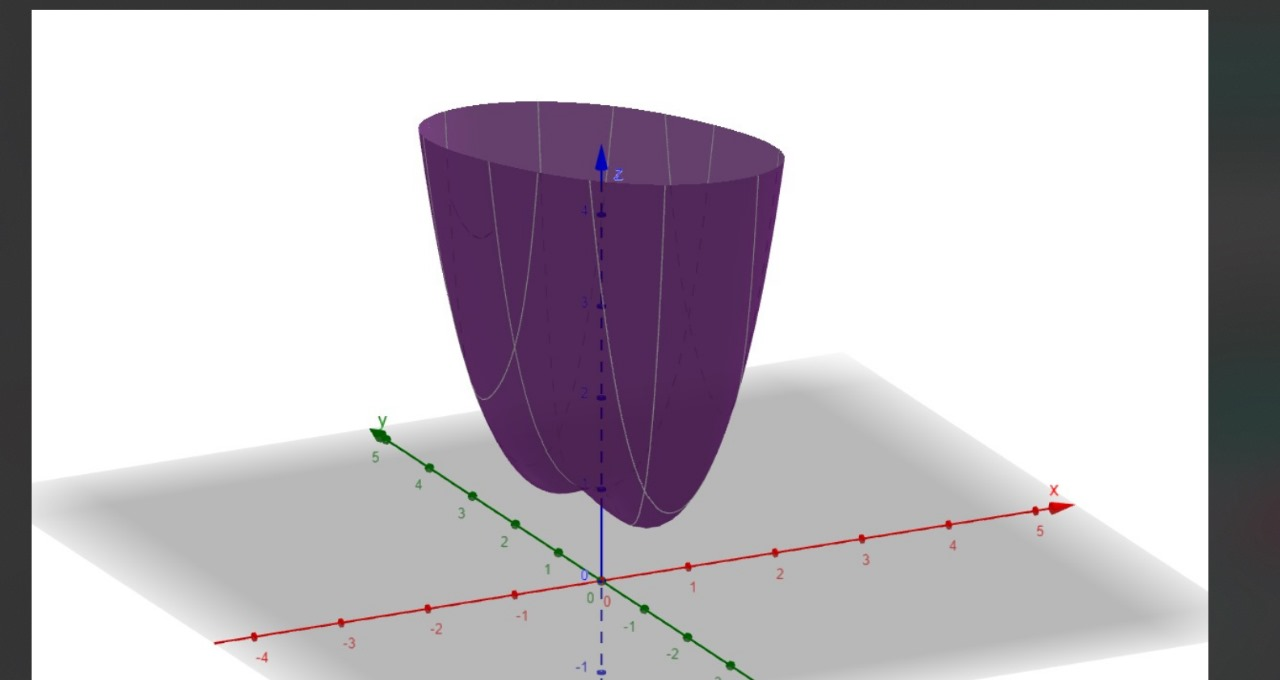

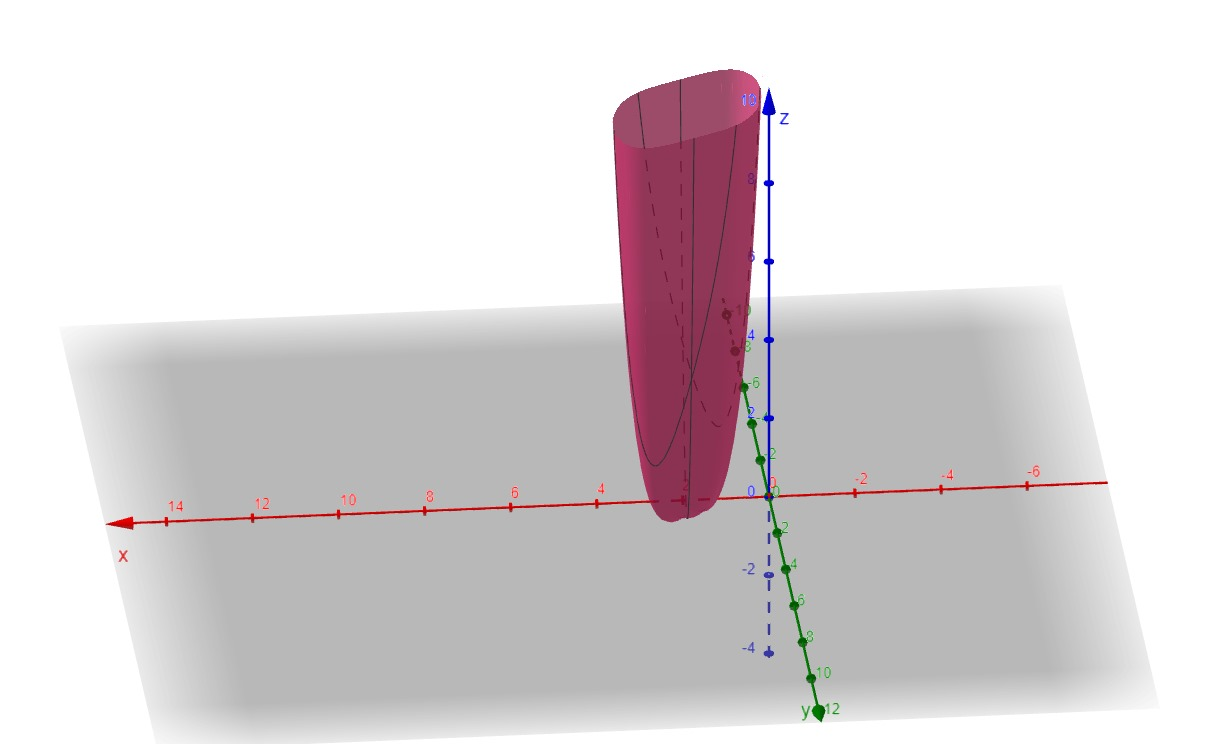

### Função 2

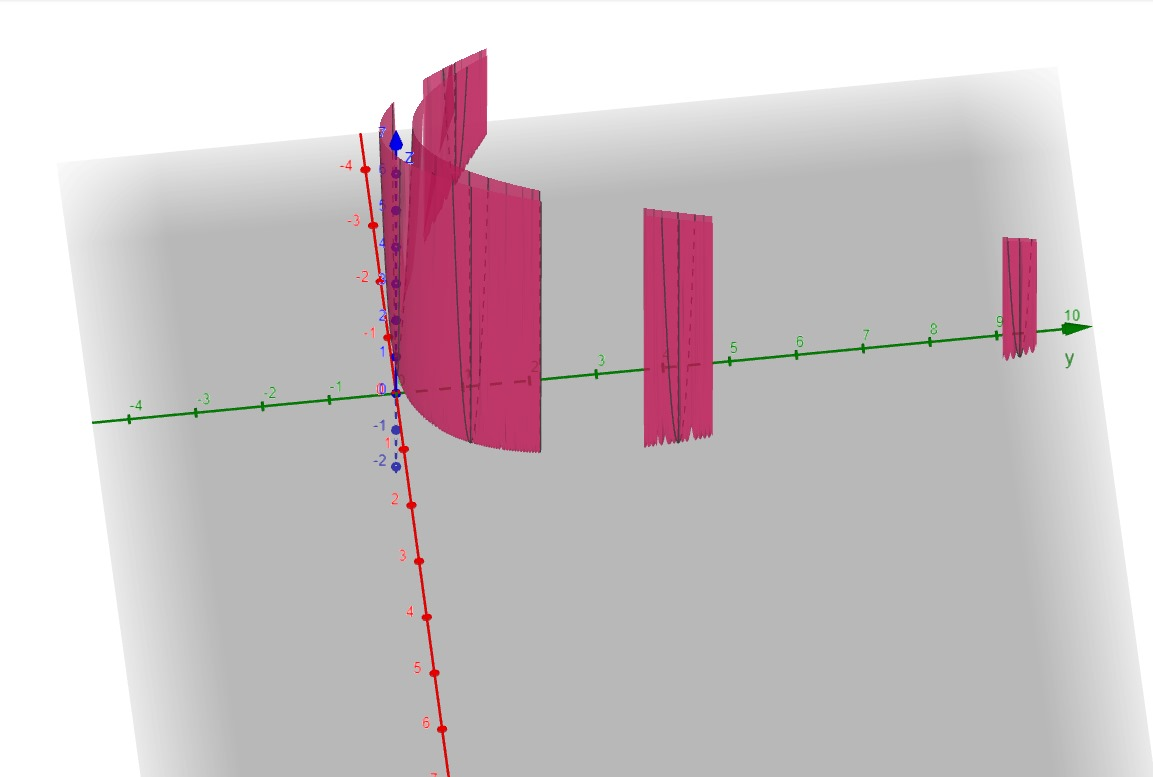

###Função 3

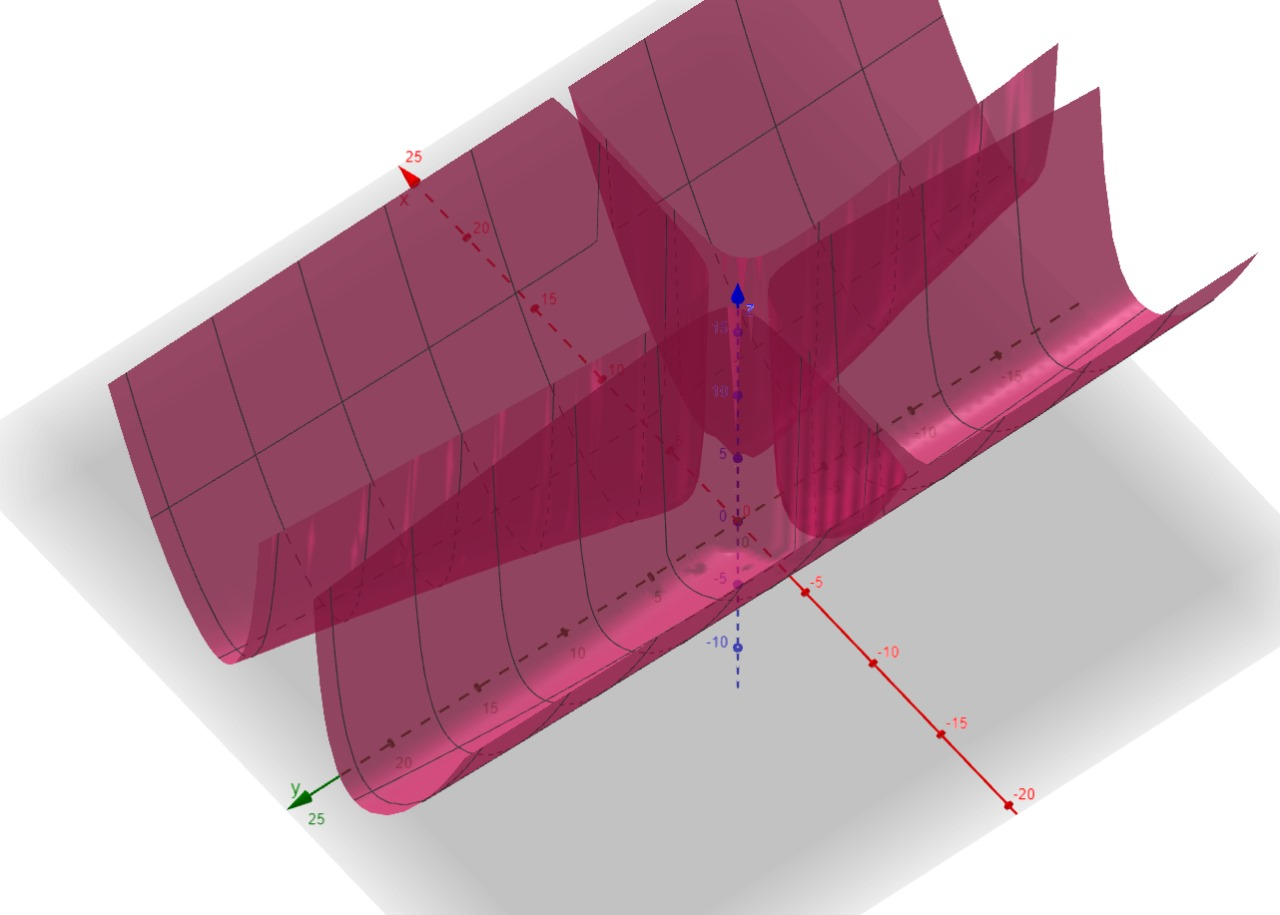

# Execução principal

In [ ]:
import autograd.numpy as np
from scipy.optimize import minimize

# Função objetivo f1
def funcao_f1(x):
    return (x[0] - 2)**4 + (x[0] - 2 * x[1])**2

# Gradiente de f1
def gradiente_f1(x):
    df1_dx0 = 4 * (x[0] - 2)**3 + 2 * (x[0] - 2 * x[1])
    df1_dx1 = -4 * (x[0] - 2 * x[1])
    return np.array([df1_dx0, df1_dx1])

# Função objetivo f2
def funcao_f2(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

# Gradiente de f2
def gradiente_f2(x):
    df2_dx0 = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    df2_dx1 = 200 * (x[1] - x[0]**2)
    return np.array([df2_dx0, df2_dx1])

# Função objetivo f3
def funcao_f3(x):
    return 0.1 * (12 + x[0]**2 + (1 + x[1]**2) / x[0]**2 + (x[0]**2 * x[1]**2 + 100) / (x[0]**4 * x[1]**4))

# Gradiente de f3
def gradiente_f3(x):
    df3_dx0 = 0.1 * (2 * x[0] - 2 * (x[1]**2 + 100) / (x[0]**3))
    df3_dx1 = 0.1 * (2 * x[1] / x[0]**2)
    return np.array([df3_dx0, df3_dx1])

# Função objetivo f4
def funcao_f4(x):
    return (x[0]**2 + x[1]**2 + x[0] * x[1])**2 + np.sin(x[0])**2 + np.cos(x[1])**2
# Gradiente de f4
def gradiente_f4(x):
    df4_dx0 = 4 * x[0] * (x[0]**2 + x[1]**2 + x[0] * x[1]) + 2 * np.sin(x[0]) * np.cos(x[0])
    df4_dx1 = 4 * x[1] * (x[0]**2 + x[1]**2 + x[0] * x[1]) - 2 * np.sin(x[1]) * np.cos(x[1])
    return np.array([df4_dx0, df4_dx1])

def busca_secao_aurea(funcao, a, b, tol=1e-5):
    phi = (1 + np.sqrt(5)) / 2
    c = b - (b - a) / phi
    d = a + (b - a) / phi
    while np.abs(b - a) > tol:
        if funcao(c) < funcao(d):
            b = d
        else:
            a = c
        c = b - (b - a) / phi
        d = a + (b - a) / phi
    return (a + b) / 2

def busca_armijo(funcao, gradiente, x, p, alfa=0.1, beta=0.7, sigma=0.1):
    # x: ponto atual
    # p: direção de descida
    # alfa, beta, sigma: parâmetros da regra de Armijo
    t = 1
    while funcao(x + t * p) > funcao(x) + sigma * t * np.dot(gradiente(x), p):
        t *= beta
    return t

def BFGS(funcao, gradiente, ponto_inicial, metodo_busca=''):
    x = ponto_inicial
    tol = 1e-5
    max_iter = 1000
    for _ in range(max_iter):
        grad = gradiente(x)
        p = -grad
        if metodo_busca == 'seção_aurea':
            t = busca_secao_aurea(lambda t: funcao(x + t * p), 0, 1)
        elif metodo_busca == 'armijo':
            t = busca_armijo(funcao, gradiente, x, p)
        else:
            raise ValueError("Método de busca linear desconhecido.")
        x = x + t * p
        if np.linalg.norm(grad) < tol:
            break
    FunOpt = funcao(x)
    PontoOpt = x
    return FunOpt, PontoOpt



In [ ]:
def main():

    ponto_inicial = np.array([float(x) for x in input("Digite o ponto inicial (por exemplo, 0, 3): ").split(",")])
    metodo_busca = input("Escolha o método de busca linear ('seção_aurea' ou 'armijo'): ").strip().lower()

    print("Escolha a função objetivo:")
    print("1: funcao_f1")
    print("2: funcao_f2")
    print("3: funcao_f3")
    print("4: funcao_f4")
    funcao_esc = int(input("Digite o número da função que você deseja usar: "))

    if funcao_esc == 1:
        funcao = funcao_f1
        gradiente = gradiente_f1
    elif funcao_esc == 2:
        funcao = funcao_f2
        gradiente = gradiente_f2
    elif funcao_esc == 3:
        funcao = funcao_f3
        gradiente = gradiente_f3
    elif funcao_esc == 4:
        funcao = funcao_f4
        gradiente = gradiente_f4
    else:
        print("Opção inválida, usando funcao_f1 por padrão.")
        funcao = funcao_f1
        gradiente = gradiente_f1

    # Executar o método BFGS
    FunOpt, PontoOpt = BFGS(funcao, gradiente, ponto_inicial, metodo_busca)

    print(f"\Valor ótimo: {FunOpt}")
    print(f"Ponto ótimo: {PontoOpt}")

    # Usando o scipy.optimize.minimize com BFGS:
    resultado = minimize(funcao, ponto_inicial, method='BFGS')
    print("\nValor ótimo com scipy:", resultado.fun)
    print("Ponto ótimo com scipy:", resultado.x)

# Rodar a função principal
if __name__ == "__main__":
    main()

Digite o ponto inicial (por exemplo, 0, 3): 0.5,0.5
Escolha o método de busca linear ('seção_aurea' ou 'armijo'): seção_aurea
Escolha a função objetivo:
1: funcao_f1
2: funcao_f2
3: funcao_f3
4: funcao_f4
Digite o número da função que você deseja usar: 3
\Valor ótimo: 3.497088111156497
Ponto ótimo: [3.88311928 0.49152141]

Valor ótimo com scipy: 1.7441520055877413
Ponto ótimo com scipy: [1.74345207 2.0296946 ]
